In [1]:
import cv2
import matplotlib.pyplot as plt

import numpy as np

In [2]:
def show(img):
    plt.figure(figsize=(20, 10))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
        
def plot_hor_lines(img, hor_lines):
    local_img = img.copy()
    for value in hor_lines:
        # cv2.line(local_img, (0, value), (local_img.shape[-1] - 1, value + 2,), (0, 255, 0) , 2)
        cv2.line(local_img, (0, value), (img.shape[1], value), (0, 255, 0) , 2)
    return local_img


def plot_ver_lines(img, ver_lines):
    local_img = img.copy()
    for value in ver_lines:
        cv2.line(local_img, (value, 0), (value, img.shape[1]), (0, 255, 0) , 2)
    return local_img

In [8]:
img = cv2.imread('test_image.png')

In [12]:
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gaussianFilter = cv2.GaussianBlur(grayImage, (5, 5), 0)

_, binarizedImage = cv2.threshold(gaussianFilter, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

binarizedImage[binarizedImage == 0] = 0
binarizedImage[binarizedImage == 255] = 1

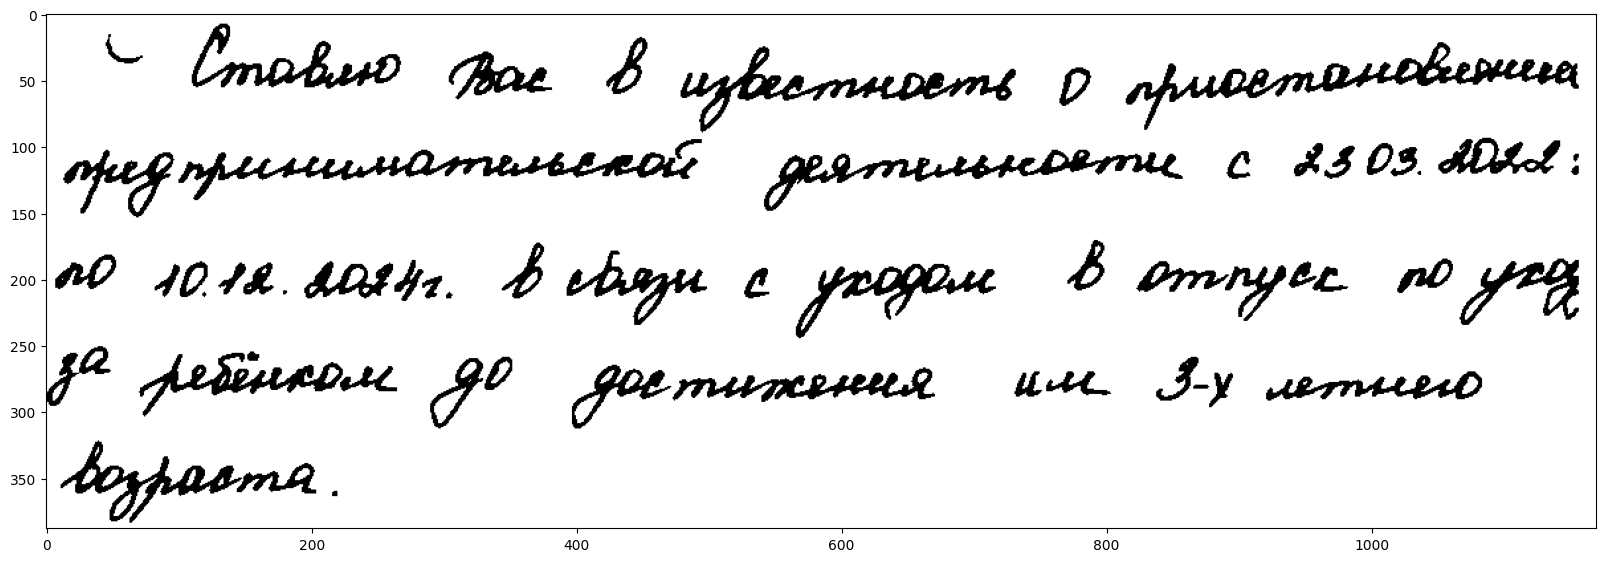

In [13]:
show(binarizedImage)

width :  1170
height :  388


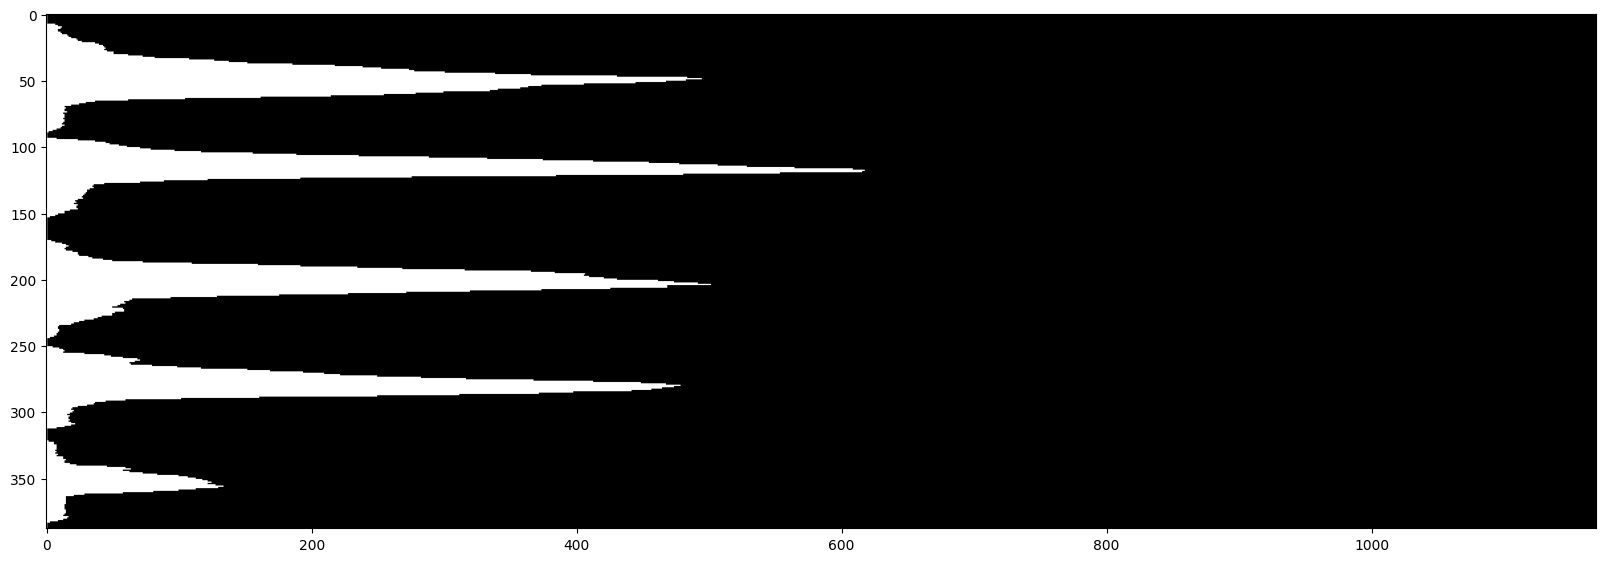

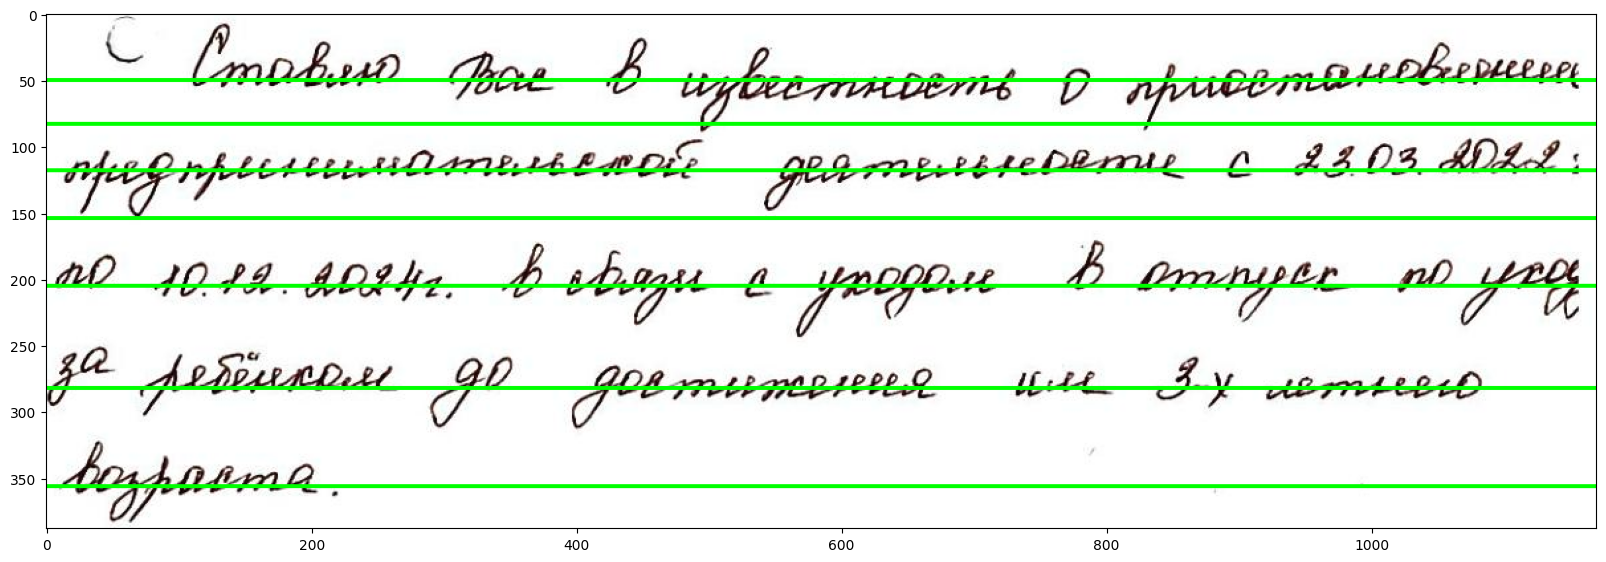

In [11]:
height, width = binarizedImage.shape
print('width : ', width)
print('height : ', height)
blankImage = np.zeros((height, width, 3), np.uint8)

horizontal_projection = np.sum(binarizedImage, axis=1)

for row in range(height):
    # cv2.line(blankImage, (0, row), (int((horizontal_projection[row]) * width / height), row), (255, 255, 255), 1)
    cv2.line(blankImage, (0, row), (int(horizontal_projection[row]), row), (255, 255, 255), 1)
    
show(blankImage)

from scipy.signal import find_peaks, find_peaks_cwt

valleys = find_peaks_cwt(horizontal_projection, np.arange(1, 30))

line_centers = [int(valley) for valley in valleys]

show(plot_hor_lines(img, line_centers))

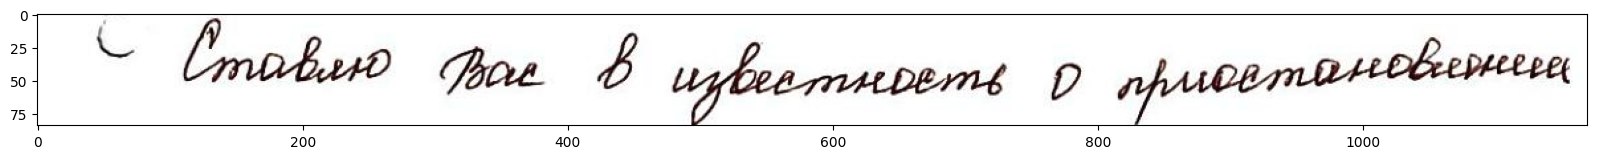

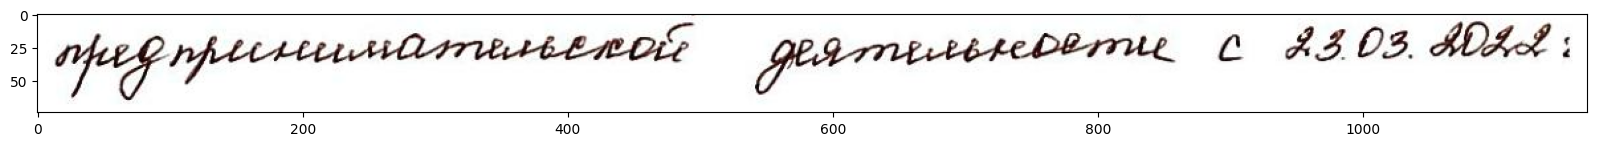

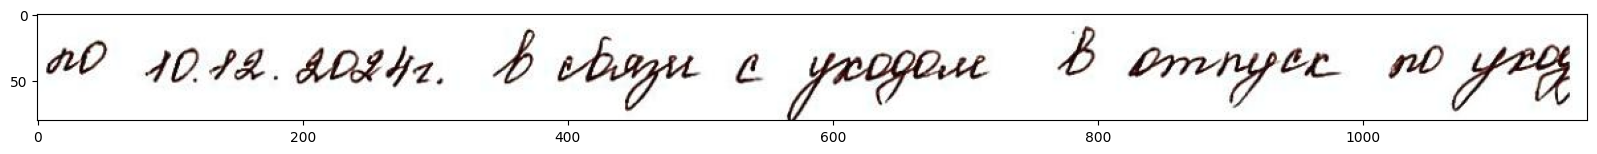

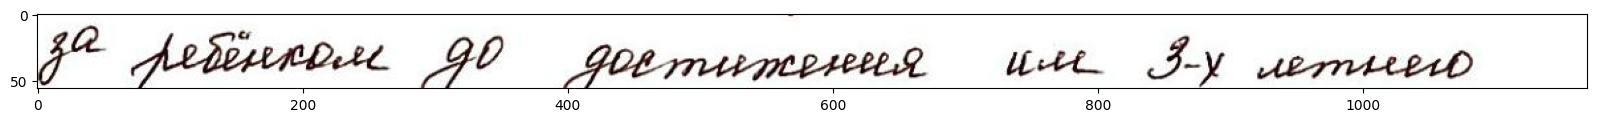

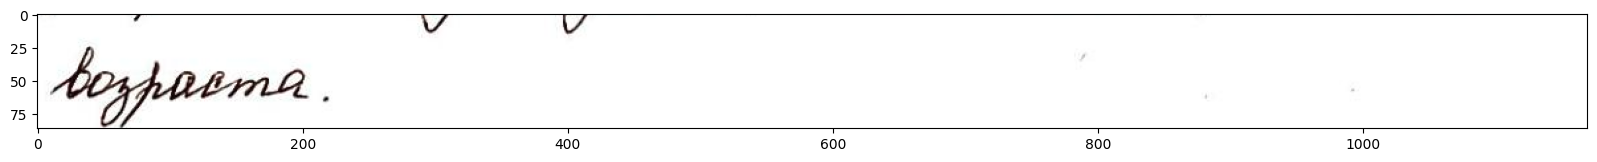

In [47]:
lines = []
for i in range(1, len(line_centers)):
    lines.append(img[line_centers[i - 1]: line_centers[i], 0: img.shape[1]])
    show(lines[-1])

In [48]:
line = lines[0]



In [71]:
def find_plateaus(seq, cmpwith):
    result = []
    start = None
    end = None
    
    for i, value in enumerate(seq):
        if value == cmpwith and start is None:
            end = None
            start = i
        if value != cmpwith and end is None:
            end = i
            result.append((start, end))
            start = None
    
    if start is not None and end is None:
        result.append((start, i))
            
    return result

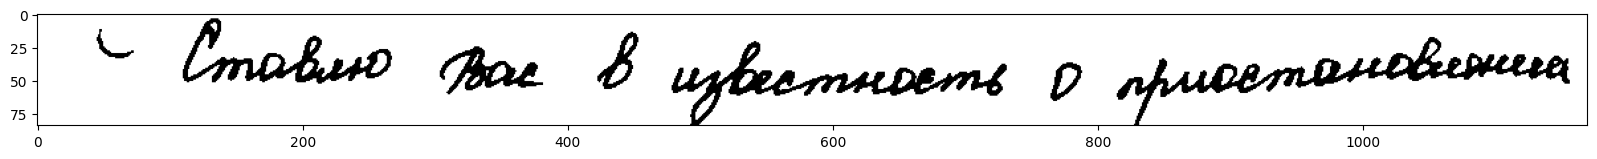

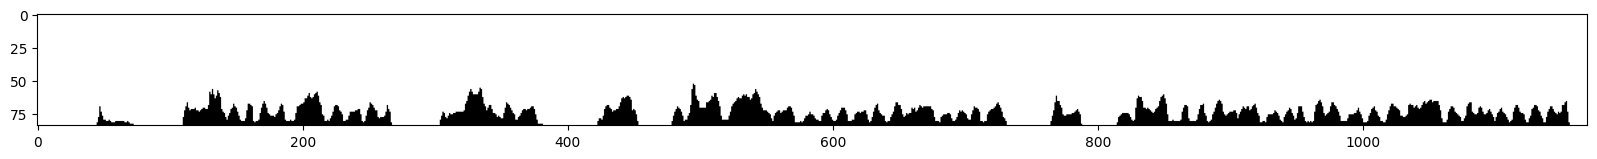

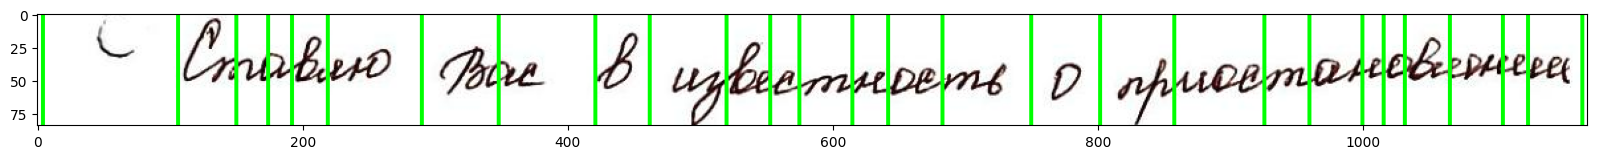

In [61]:
grayImage = cv2.cvtColor(line, cv2.COLOR_BGR2GRAY)

gaussianFilter = cv2.GaussianBlur(grayImage, (5, 5), 0)


_, binarizedImage = cv2.threshold(gaussianFilter, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show(binarizedImage)

binarizedImage[binarizedImage == 0] = 0
binarizedImage[binarizedImage == 255] = 1


height, width = binarizedImage.shape


blankImage = np.zeros((height, width, 3), np.uint8)

vertical_projection = np.sum(binarizedImage, axis=0)

for column in range(width):
    # cv2.line(blankImage, (0, row), (int((horizontal_projection[row]) * width / height), row), (255, 255, 255), 1)
    cv2.line(blankImage, (column, 0), (column, int(vertical_projection[column])), (255, 255, 255), 1)
    
show(blankImage)

valleys = find_peaks_cwt(vertical_projection, np.arange(1, 30))

line_centers = [int(valley) for valley in valleys]

show(plot_ver_lines(line, line_centers))

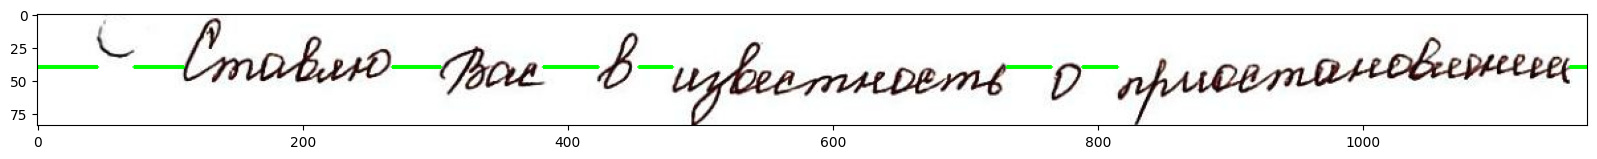

In [77]:
plateaus = find_plateaus(vertical_projection, 84)
line_copy = line.copy()
for item in plateaus:
    cv2.line(line_copy, (item[0], 40), (item[1], 40), (0, 255, 0) , 2)
    
show(line_copy)

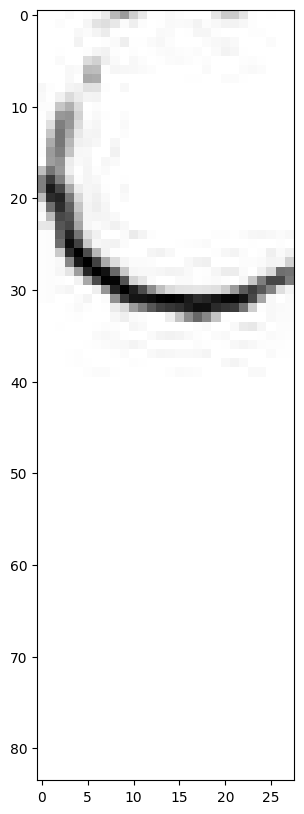

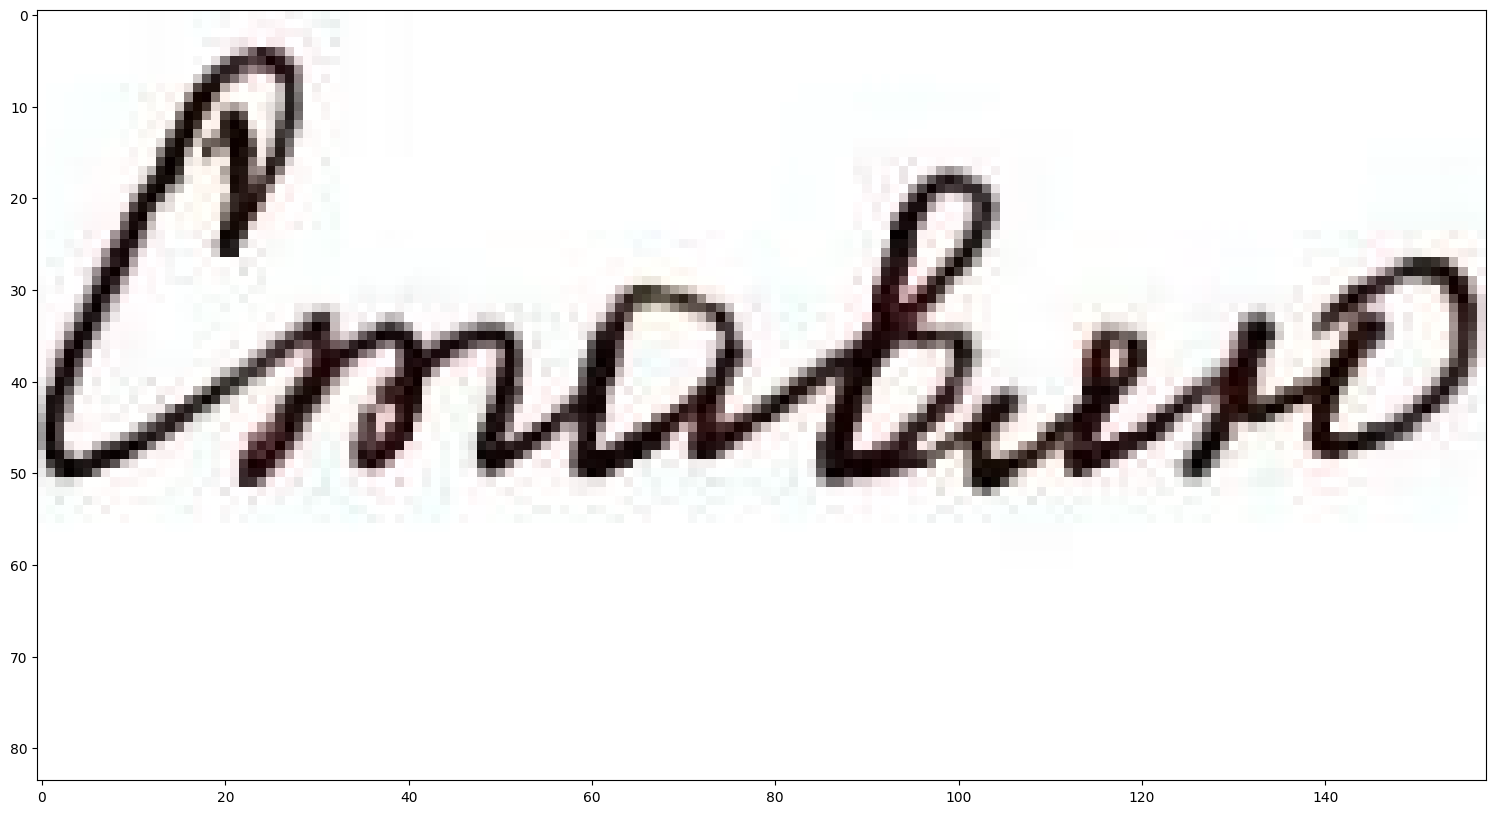

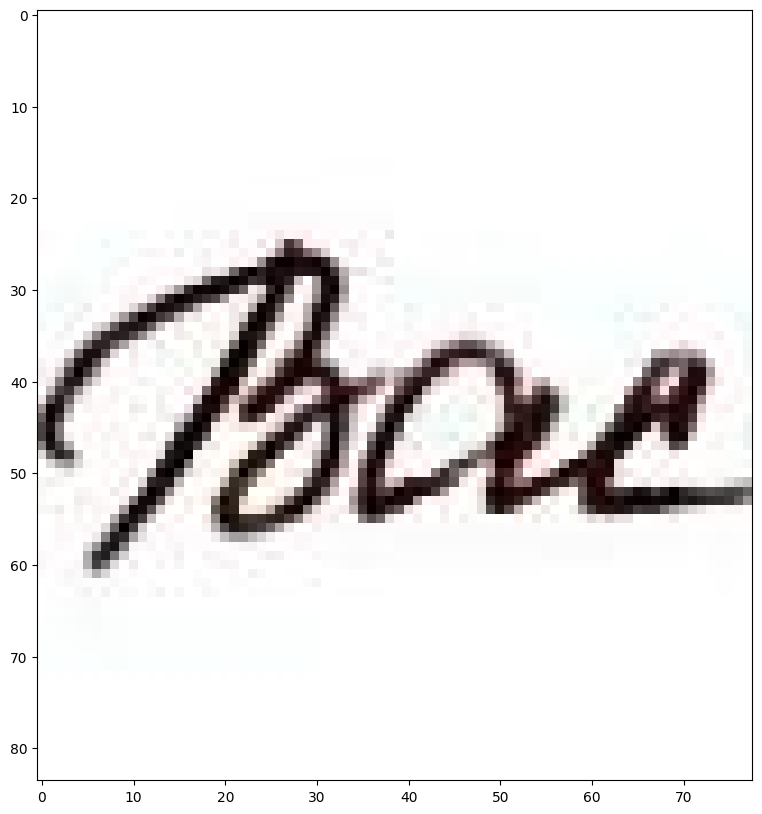

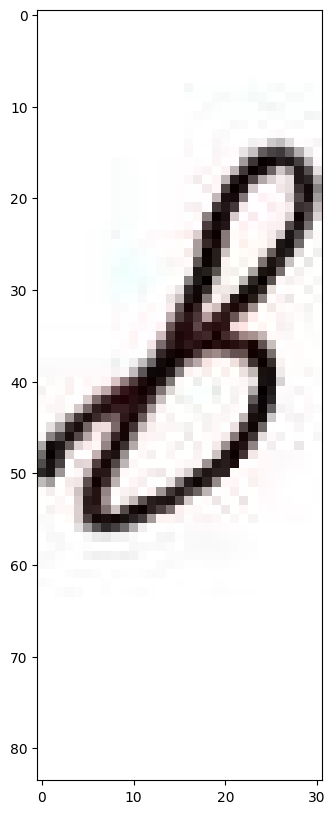

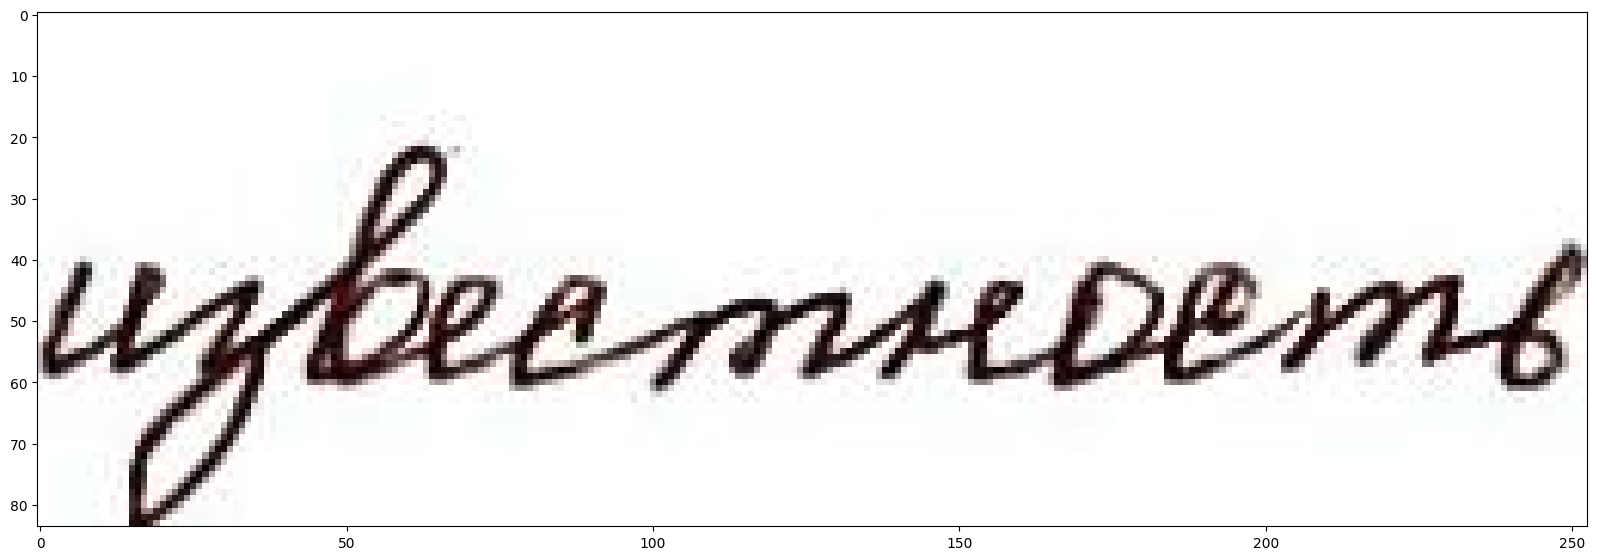

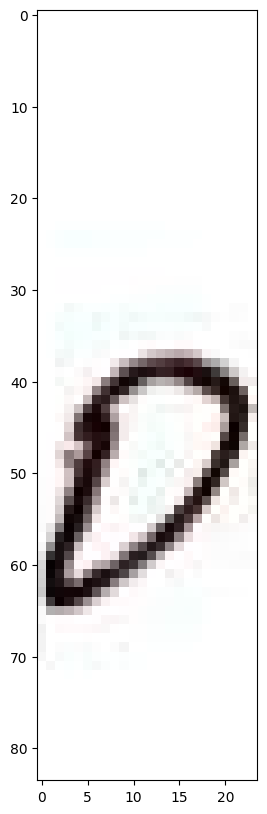

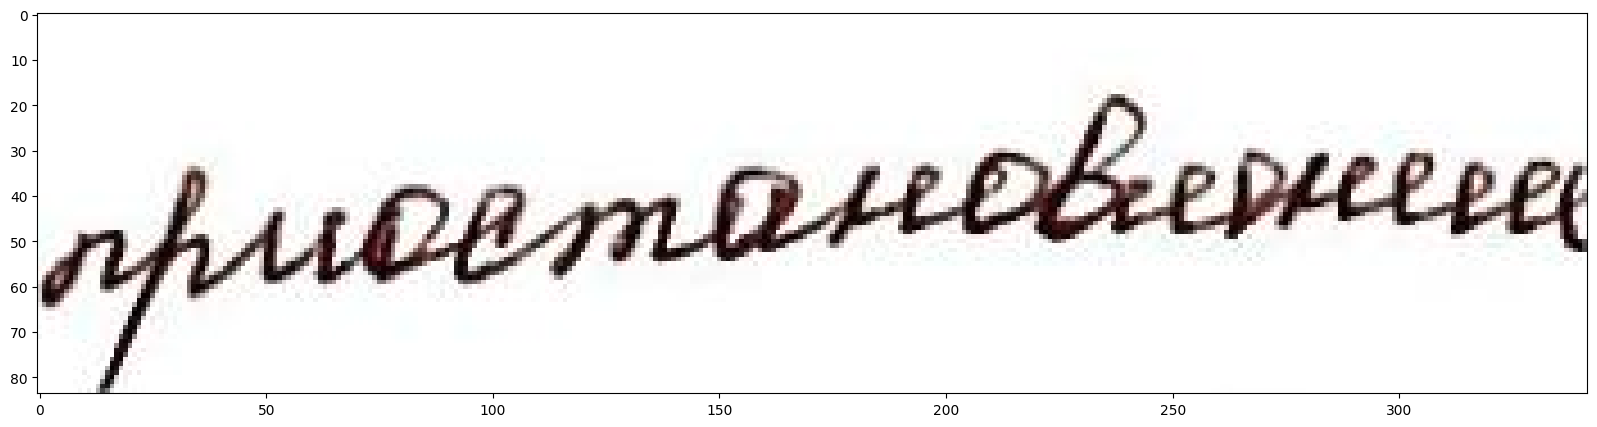

In [82]:
for i in range(1, len(plateaus)):
    show(line[..., plateaus[i - 1][1]: plateaus[i][0], 0:3])